<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/DataProcessing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


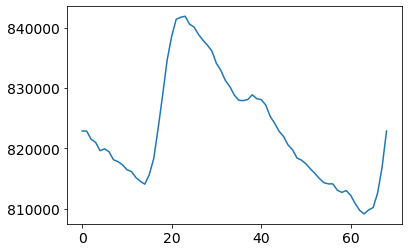

In [6]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

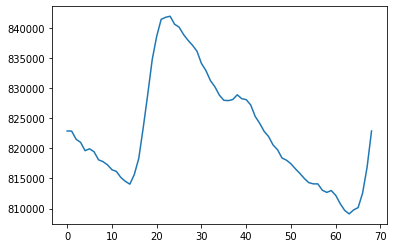

In [ ]:
ppg2 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

numpy.ndarray

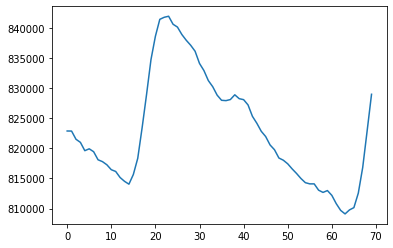

In [ ]:
signal = data[:,0]
t = signal[int(1):int(71)];
#a = [x for x in t]
#a = DataFrame.transpose(DataFrame(t))
#s = list()
#s.append(a)
pyplot.plot(t)
type(signal)

# Segment data to N row

In [7]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 150
data0 = load_data('drive/My Drive/Dataset/InvertPhaseLong2.csv')  
ppgl0 = segment_data(data0[70:17220,0],d,0.5)  #in-phase
ppgl1 = segment_data(data0[70:,1],d,0.5)  # in-phase 
ppgl2 = segment_data(data0[70:,2],d,0.5)  # invert-phase
ppgl3 = segment_data(data0[70:,3],d,0.5)  # in-phase

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[70:,1],d,0.5)
ppg3 = segment_data(data2[70:,0],d,0.5) # Positive with noise

data3 = load_data('drive/My Drive/Dataset/sejanCun1.csv') 
ppgs0 = segment_data(data3[70:,0],d,0.5) # invert-phase
ppgs1 = segment_data(data3[70:,1],d,0.5) # noise
ppgs2 = segment_data(data3[1400:20200,2],d,0.5) # invert-phase
ppgs3 = segment_data(data3[70:,3],d,0.5) # noise

data4 = load_data('drive/My Drive/Dataset/longcunDB01.csv') 
ppgla0 = segment_data(data4[70:,0],d,0.5) # invert-phase
ppgla1 = segment_data(data4[70:,1],d,0.5) # noise
ppgla2 = segment_data(data4[70:,2],d,0.5) # invert-phase
ppgla3 = segment_data(data4[70:,3],d,0.5) # invert-phase

data5 = load_data('drive/My Drive/Dataset/InvertPhaseLong1.csv') 
ppglb0 = segment_data(data5[70:,0],d,0.5) # not good invert-phase
ppglb1 = segment_data(data5[70:,1],d,0.5) # in-phase
ppglb2 = segment_data(data5[70:,2],d,0.5) # invert-phase
ppglb3 = segment_data(data5[70:,3],d,0.5) # in-phase

data6 = load_data('drive/My Drive/Dataset/sejanCun2.csv') 
ppgsa0 = segment_data(data6[70:,0],d,0.5) # in-phase
ppgsa1 = segment_data(data6[70:,1],d,0.5) # noise
ppgsa2 = segment_data(data6[70:,2],d,0.5) # in-phase
ppgsa3 = segment_data(data6[70:,3],d,0.5) # noise

data7 = load_data('drive/My Drive/Dataset/sejanGuan2.csv') 
ppgsb0 = segment_data(data7[70:,0],d,0.5) # not good invert-phase
ppgsb1 = segment_data(data7[70:,1],d,0.5) # invert-phase
ppgsb2 = segment_data(data7[70:,2],d,0.5) # not good invert-phase
ppgsb3 = segment_data(data7[70:,3],d,0.5) # invert-phase

data8 = load_data('drive/My Drive/Dataset/dauChi01.csv') 
ppgd0 = segment_data(data8[70:,0],d,0.5) #  invert-phase
ppgd1 = segment_data(data8[70:,1],d,0.5) # NG invert-phase
ppgd2 = segment_data(data8[70:,2],d,0.5) #  invert-phase
ppgd3 = segment_data(data8[70:,3],d,0.5) # NG invert-phase

data9 = load_data('drive/My Drive/Dataset/dauGuan2.csv') 
ppgda0 = segment_data(data9[70:,0],d,0.5) #  in-phase
ppgda1 = segment_data(data9[70:,1],d,0.5) # noise -inphase
ppgda2 = segment_data(data9[70:,2],d,0.5) #  in-phase
ppgda3 = segment_data(data9[70:,3],d,0.5) # noise in-phase

data10 = load_data('drive/My Drive/Dataset/haiCun01.csv') 
ppgh0 = segment_data(data10[70:,0],d,0.5) #  in-phase
ppgh1 = segment_data(data10[70:,1],d,0.5) # noise -inphase
ppgh2 = segment_data(data10[70:,2],d,0.5) #  in-phase
ppgh3 = segment_data(data10[70:,3],d,0.5) # noise in-phase

data11 = load_data('drive/My Drive/Dataset/haiChi01.csv') 
ppgha0 = segment_data(data11[70:,0],d,0.5) #  noise
ppgha1 = segment_data(data11[70:,1],d,0.5) # noise 
ppgha2 = segment_data(data11[70:,2],d,0.5) #  noise 
ppgha3 = segment_data(data11[70:,3],d,0.5) # noise 

data12 = load_data('drive/My Drive/Dataset/longCun01.csv') 
ppglc0 = segment_data(data12[70:,0],d,0.5) # invert-phase
ppglc1 = segment_data(data12[70:,1],d,0.5) # invert-phase
ppglc2 = segment_data(data12[70:,2],d,0.5) # invert-phase
ppglc3 = segment_data(data12[70:,3],d,0.5) # invert-phase

data13 = load_data('drive/My Drive/Dataset/longGuan01.csv') 
ppgld0 = segment_data(data13[70:,0],d,0.5) # invert-phase
ppgld1 = segment_data(data13[70:,1],d,0.5) # in-phase
ppgld2 = segment_data(data13[70:,2],d,0.5) # invert-phase
ppgld3 = segment_data(data13[70:,3],d,0.5) # in-phase not good

data14 = load_data('drive/My Drive/Dataset/longChi01.csv') 
ppgle0 = segment_data(data14[70:,0],d,0.5) # NG invert-phase
ppgle1 = segment_data(data14[70:,1],d,0.5) # invert-phase
ppgle2 = segment_data(data14[70:,2],d,0.5) # NG invert-phase
ppgle3 = segment_data(data14[70:,3],d,0.5) # invẻt-phase 

data15 = load_data('drive/My Drive/Dataset/longChiA01.csv') 
ppglf0 = segment_data(data15[70:,0],d,0.5) # in-phase
ppglf1 = segment_data(data15[70:,1],d,0.5) # NG in-phase
ppglf2 = segment_data(data15[70:,2],d,0.5) # in-phase
ppglf3 = segment_data(data15[70:,3],d,0.5) # NG in-phase 

data16 = load_data('drive/My Drive/Dataset/longTest15.csv') 
ppglg0 = segment_data(data16[70:,0],d,0.5) # invert-phase
ppglg1 = segment_data(data16[70:,1],d,0.5) # invert-phase
ppglg2 = segment_data(data16[70:,2],d,0.5) # noise
ppglg3 = segment_data(data16[70:,3],d,0.5) # invert-phase 

s1 = np.concatenate((ppgl0, ppgl1, ppgl3, ppglb1,ppglb3, ppgsa0, ppgsa2, ppgda0, ppgda2, ppgld1, ppgld3, ppglf0, ppglf1, ppglf2, ppglf3)) # in-phase
#s2 = np.concatenate((ppgl2, ppgs0, ppgla0, ppgla2, ppgla3, ppglb2, ppgsb1, ppgsb3, ppgd0, ppgd2, ppglc0, ppglc1, ppglc2, ppgle1, ppgle3))  # invert-phase
s2 = np.concatenate(( ppgsb1, ppgsb3, ppgl2, ppgla2, ppgla3, ppglb2, ppglc0, ppglc1, ppglc2, ppgle1, ppgle3, ppglg0, ppglg1, ppglg3))  # invert-phase
s3 = np.concatenate((ppg2, ppgs1, ppgs3,ppgla1, ppgsa1, ppgsa3, ppgda1, ppgda3, ppgh0, ppgh1, ppgha0, ppgha1, ppgha2, ppgha3, ppglg2))           # noise Data

In [8]:
ppgle0.shape, ppglg0.shape

((273, 150), (283, 150))

NameError: ignored

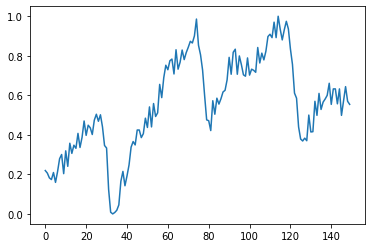

In [16]:
pyplot.plot(X_train[8])
ppg.shape

Prepare Data for Training
- Transform using MinMaxScaler will scaling along array point by point in column
+ Data need to Fist Transpose() -> Apply MinMaxScaler() -> Transpose() back

In [9]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [-1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((s1, s2, s3))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)

((4231,), (3849,), (4113,))
(12193, 150)


In [18]:
print(y3)

[0 0 0 ... 0 0 0]


IndexError: ignored

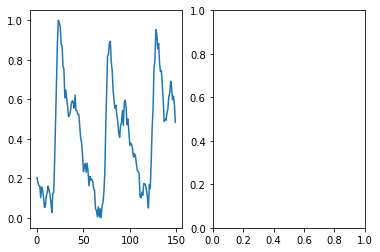

In [10]:
pyplot.subplot(121)
pyplot.plot(Xscaled[1500])
pyplot.subplot(122)
pyplot.plot(Xscaled3[339])
#Xscaled[1:2]

Repearing Data

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.33, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
X_val = X_val.reshape((X_val.shape[0],X_val.shape[1],1))
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes= 3)
y_val = to_categorical(y_val, num_classes= 3)

In [22]:
print(sum(y_val==1))

[655 716 641]


(8169, 150, 1)


NameError: ignored

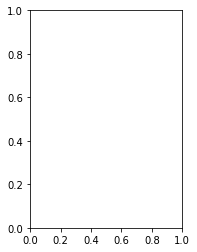

In [23]:
print(X_train.shape)
pyplot.subplot(121)
pyplot.plot(ppg[1])

pyplot.subplot(122)
pyplot.plot(ppg[2])


pyplot.show()

In [ ]:
# convert ppg to array
import numpy as np
from pandas import DataFrame


df1= DataFrame(s1)
df2= DataFrame(s2)
print(df1.shape)
print(df2.shape)

In [ ]:
# check correlate
from pandas import Series

t1 = Series(ppg1[302])
t2 = Series(ppg3[1])
t1.corr(t2, method='pearson')

0.47400187523853426

# Tranining the model

Scaler Data

In [11]:
scaler = MinMaxScaler()
print(scaler.fit(ppg))

NameError: ignored

IndexError: ignored

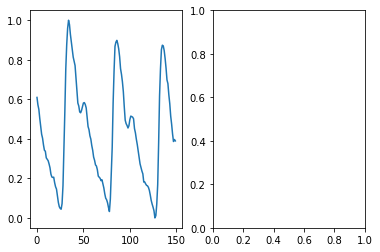

In [25]:
pyplot.subplot(121)
pyplot.plot(Xscaled[1])

pyplot.subplot(122)
pyplot.plot(Xscaled2[302])

In [12]:
# cnn model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def evaluate_model(trainX, trainy,testX, testy):
  
  model = Sequential()
  #n_timesteps = 70
  #n_features= 1
  #n_outputs=2
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  verbose, epochs, batch_size = 0, 10, 32
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit network
  model.fit(trainX, trainy,  epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return model, accuracy

In [27]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(150, 1, 3)

In [28]:
verbose, epochs, batch_size = 0, 10, 32
# fit network
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size, verbose=1)

NameError: ignored

In [13]:
from numpy import mean
from numpy import std
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
def run_experiment(repeats=10):
	
	# repeat experiment
	scores = list()
	for r in range(repeats):
		model,score = evaluate_model(X_train, y_train, X_test, y_test)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
  
	# summarize results
	summarize_results(scores)
  #return model
# run the experiment
run_experiment()

>#1: 98.807
>#2: 98.807
>#3: 98.211
>#4: 98.459
>#5: 98.608
>#6: 98.956
>#7: 98.708
>#8: 98.211
>#9: 98.410
>#10: 98.509
[98.80715608596802, 98.80715608596802, 98.21073412895203, 98.45924377441406, 98.60835075378418, 98.95626306533813, 98.7077534198761, 98.21073412895203, 98.40954542160034, 98.50894808769226]
Accuracy: 98.569% (+/-0.241)


[1. 0. 0.]


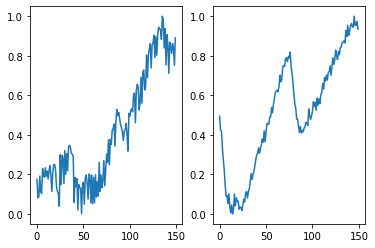

In [30]:
x = X_val[5]
pyplot.subplot(121)
pyplot.plot(x)
print(y_val[6])
pyplot.subplot(122)
pyplot.plot(X_val[6])

[0. 1. 0.]


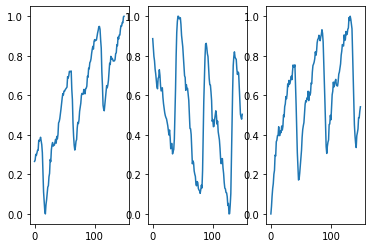

In [31]:
x = Xscaled3[9]
pyplot.subplot(131)
pyplot.plot(x)
print(y_val[61])
pyplot.subplot(132)
pyplot.plot(Xscaled[135])
pyplot.subplot(133)
pyplot.plot(Xscaled3[63])

In [32]:
print(y_val)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [33]:
model,score = evaluate_model(X_train, y_train, X_test, y_test)
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 148, 64)           256       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 146, 64)           12352     
_________________________________________________________________
dropout_10 (Dropout)         (None, 146, 64)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 73, 64)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4672)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               467300    
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [34]:
s = Xscaled3[63].reshape((1,Xscaled3.shape[1],1))
a = model.predict(s)
print(a)
a = np.around(a)
print(a)

[[4.8117386e-06 2.5787642e-03 9.9741638e-01]]
[[0. 0. 1.]]


In [35]:
result = list()
for s in Xscaled3:
  s = s.reshape((1,Xscaled3.shape[1],1))
  a = model.predict(s)
  result.append(a)

In [ ]:
result

# Tune 1D Convolutional Neural Network


*   Data Preparation
*   Number of Filters
*   Size of Kernel






# Number of Filters

In [ ]:
n_params = [8, 16, 32, 64, 128, 256]

In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')
 
def run_experiment(params, repeats=10):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(X_train, y_train, X_test, y_test, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)
 
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

NameError: ignored

# Size of Kernel

In [11]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_kernel):
	verbose, epochs, batch_size = 0, 15, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
# run an experiment
def run_experiment(params, repeats=10):
	# load data
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(X_train, y_train, X_test, y_test, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)
 
# run the experiment
n_params = [2, 3, 5, 7, 11]
run_experiment(n_params)

NameError: ignored

# import dataset second

In [ ]:
dataset2 = read_csv('drive/My Drive/Dataset/longcunDB2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20672.000000   20672.000000  ...    20672.0    20672.0
mean   884406.325077 -723318.435468  ...        0.0        0.0
std     43690.243835    6062.724870  ...        0.0        0.0
min    703142.000000 -733902.000000  ...        0.0        0.0
25%    854530.000000 -727704.500000  ...        0.0        0.0
50%    900695.500000 -724696.000000  ...        0.0        0.0
75%    917175.250000 -719469.000000  ...        0.0        0.0
max    937150.000000 -708694.000000  ...        0.0        0.0

[8 rows x 8 columns]


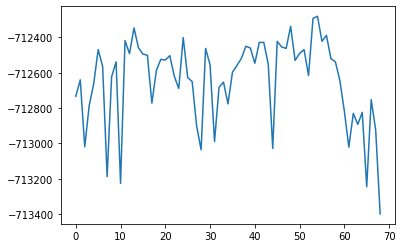

In [ ]:
from matplotlib import pyplot

print(dataset2.describe())
data2 = dataset2.values
ppg2 = data2[:,1]
pyplot.plot(ppg1[1:70])
pyplot.show()

# K-Fold Cross Validation

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

num_folds = 10
SEED = 34
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

Xrsh = X_train
yrsh = y_train
# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train, test in kfold.split(Xrsh, yrsh):
  # Build the model
  verbose, epochs, batch_size = 0, 15, 64
  n_timesteps, n_features, n_outputs = Xrsh.shape[1], Xrsh.shape[2], yrsh.shape[1]
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # Fit data to model
  history = model.fit(Xrsh[train], yrsh[train], epochs=epochs, batch_size=batch_size, verbose=verbose)
  
  # Generate generalization metrics
  scores = model.evaluate(Xrsh[test], yrsh[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')






------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.08807461708784103; accuracy of 96.45043015480042%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.07872913032770157; accuracy of 97.30722308158875%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.07491803169250488; accuracy of 97.91921377182007%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.09730759263038635; accuracy of 97.30722308158875%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.09512363374233246; accuracy of 96.69522643089294%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.

In [12]:
model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9771


[0.08578462898731232, 0.9771371483802795]

# Cross validation and plot training process

In [15]:
model = Sequential()
  #n_timesteps = 70
  #n_features= 1
  #n_outputs=2
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
verbose, epochs, batch_size = 0, 10, 32
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/500
103/103 [==============================] - 2s 11ms/step - loss: 0.8596 - accuracy: 0.5877 - val_loss: 0.5424 - val_accuracy: 0.7913
Epoch 2/500
103/103 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8220 - val_loss: 0.4115 - val_accuracy: 0.8421
Epoch 3/500
103/103 [==============================] - 0s 4ms/step - loss: 0.3366 - accuracy: 0.8725 - val_loss: 0.2431 - val_accuracy: 0.9327
Epoch 4/500
103/103 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9338 - val_loss: 0.1990 - val_accuracy: 0.9443
Epoch 5/500
103/103 [==============================] - 0s 4ms/step - loss: 0.1509 - accuracy: 0.9466 - val_loss: 0.1627 - val_accuracy: 0.9633
Epoch 6/500
103/103 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9666 - val_loss: 0.1305 - val_accuracy: 0.9584
Epoch 7/500
103/103 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9711 - val_loss: 0.1113 - val_accuracy: 0.970

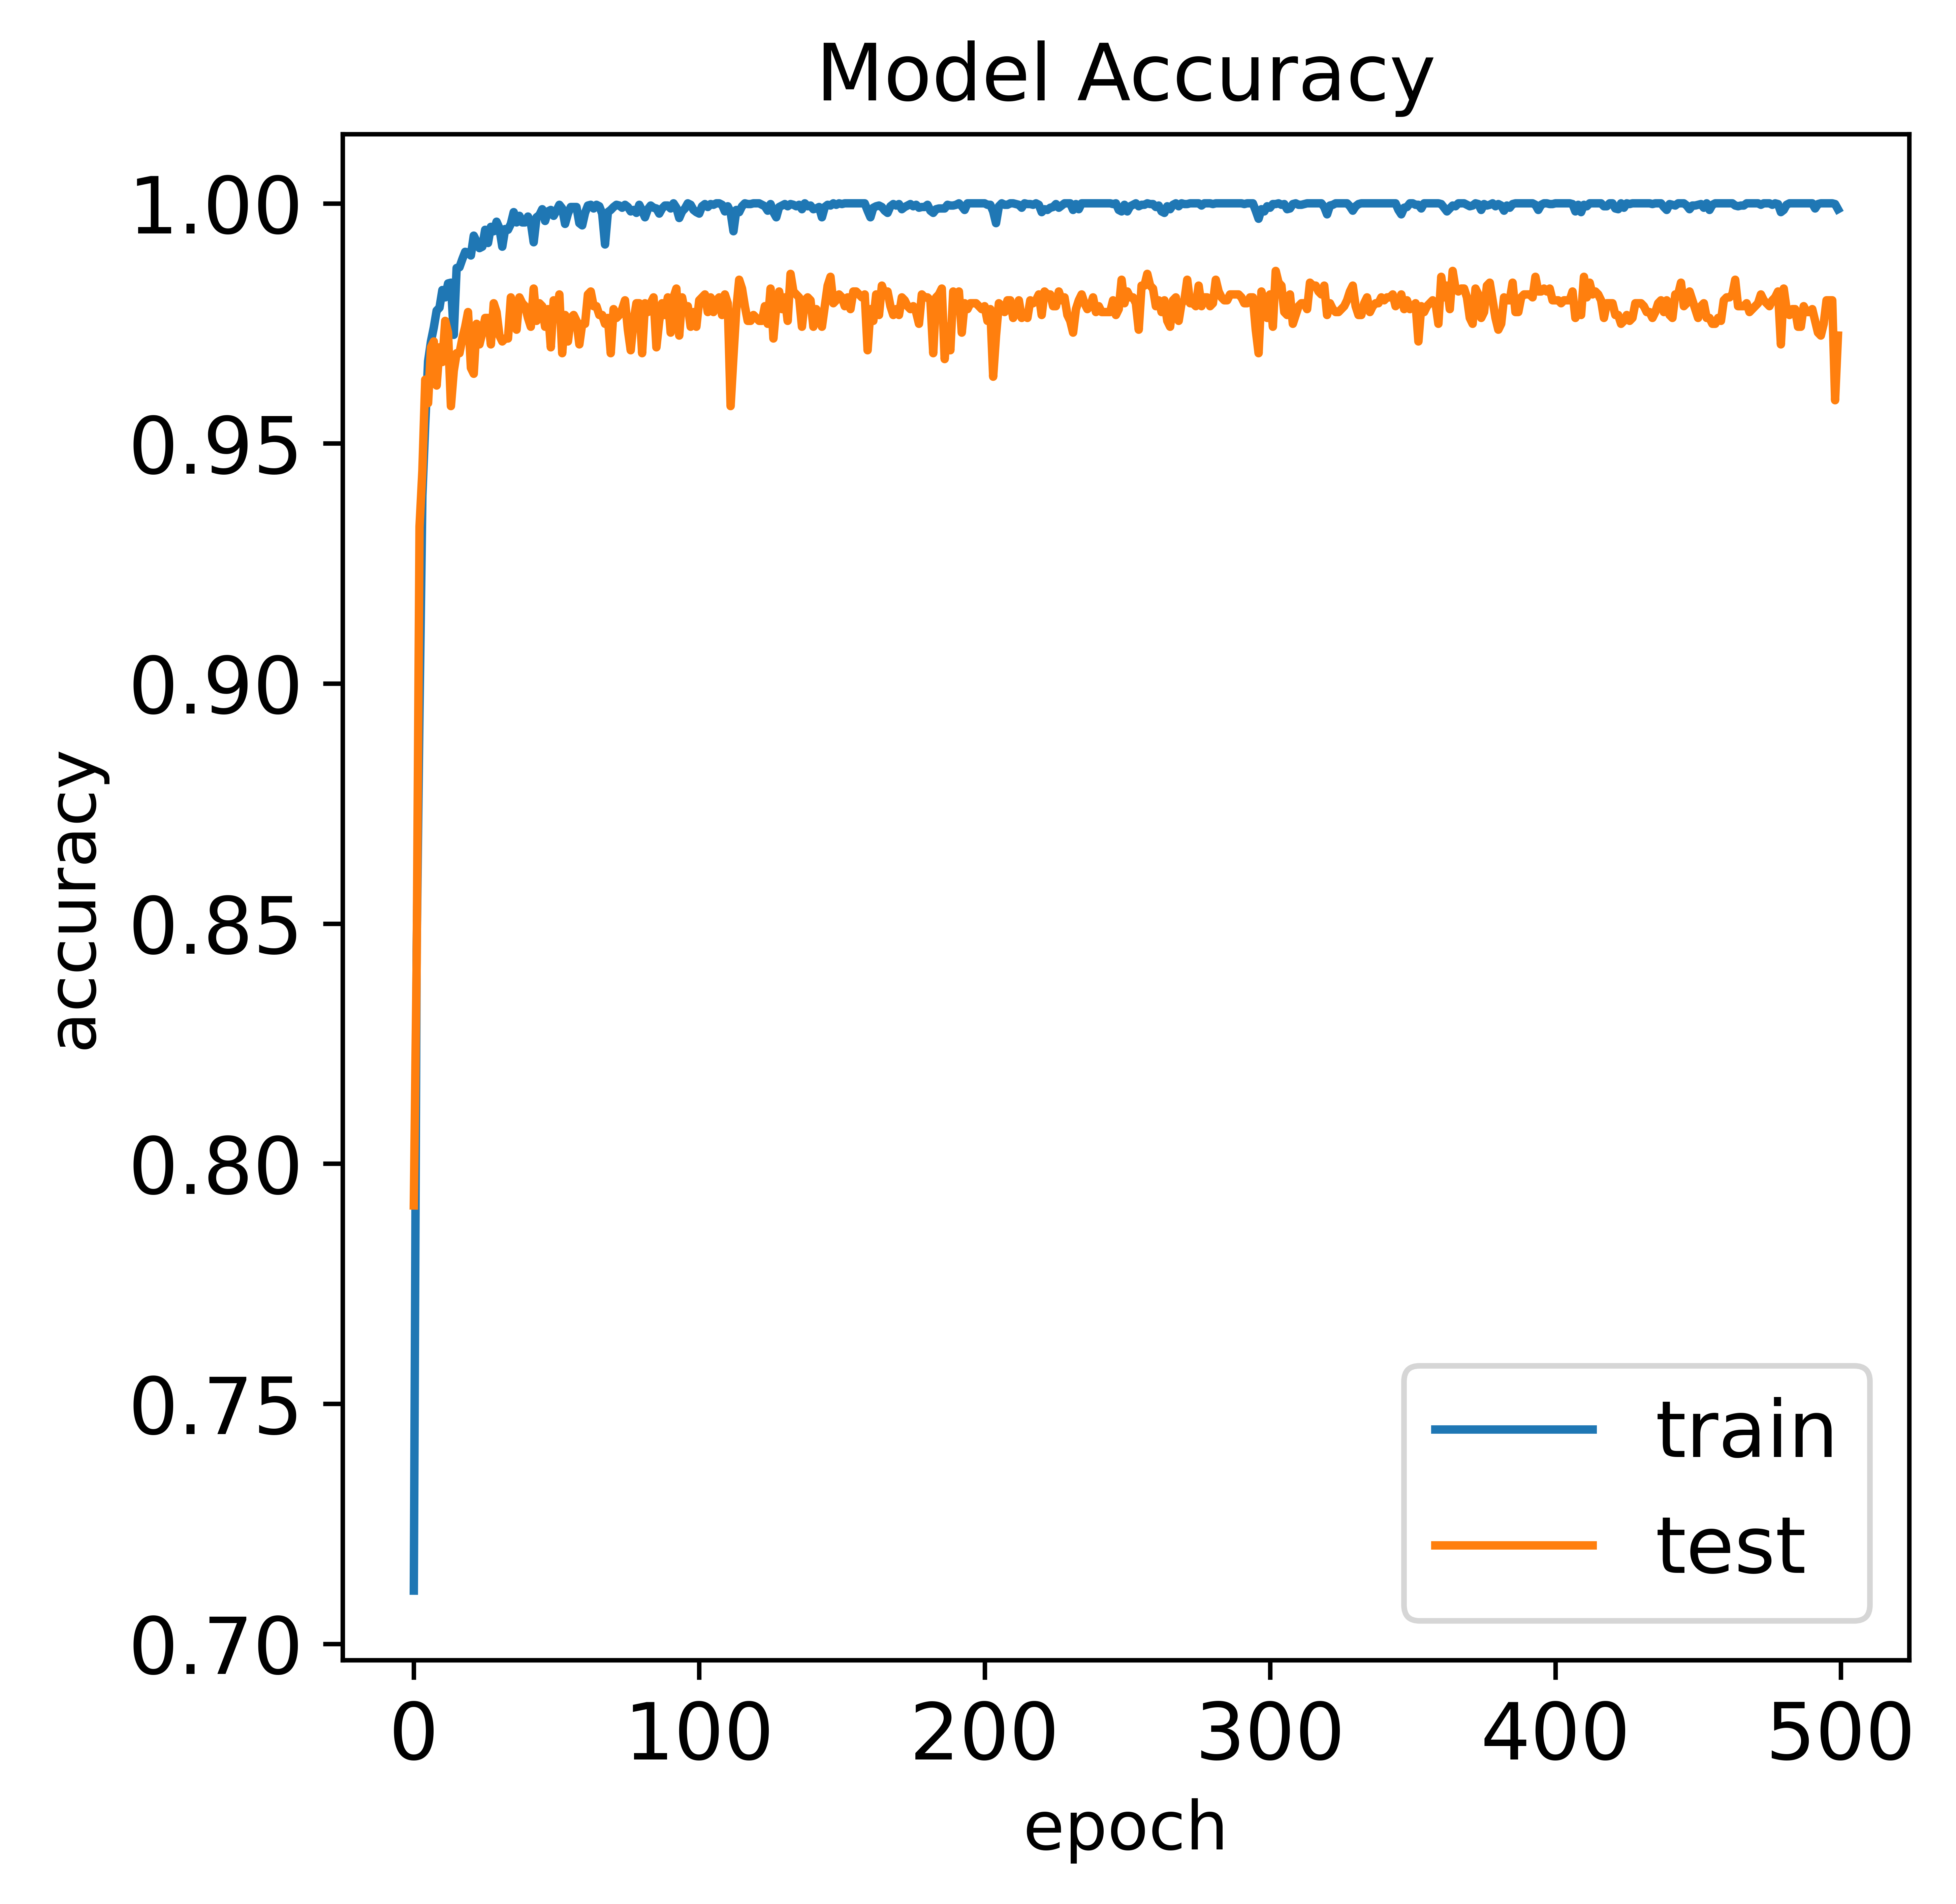

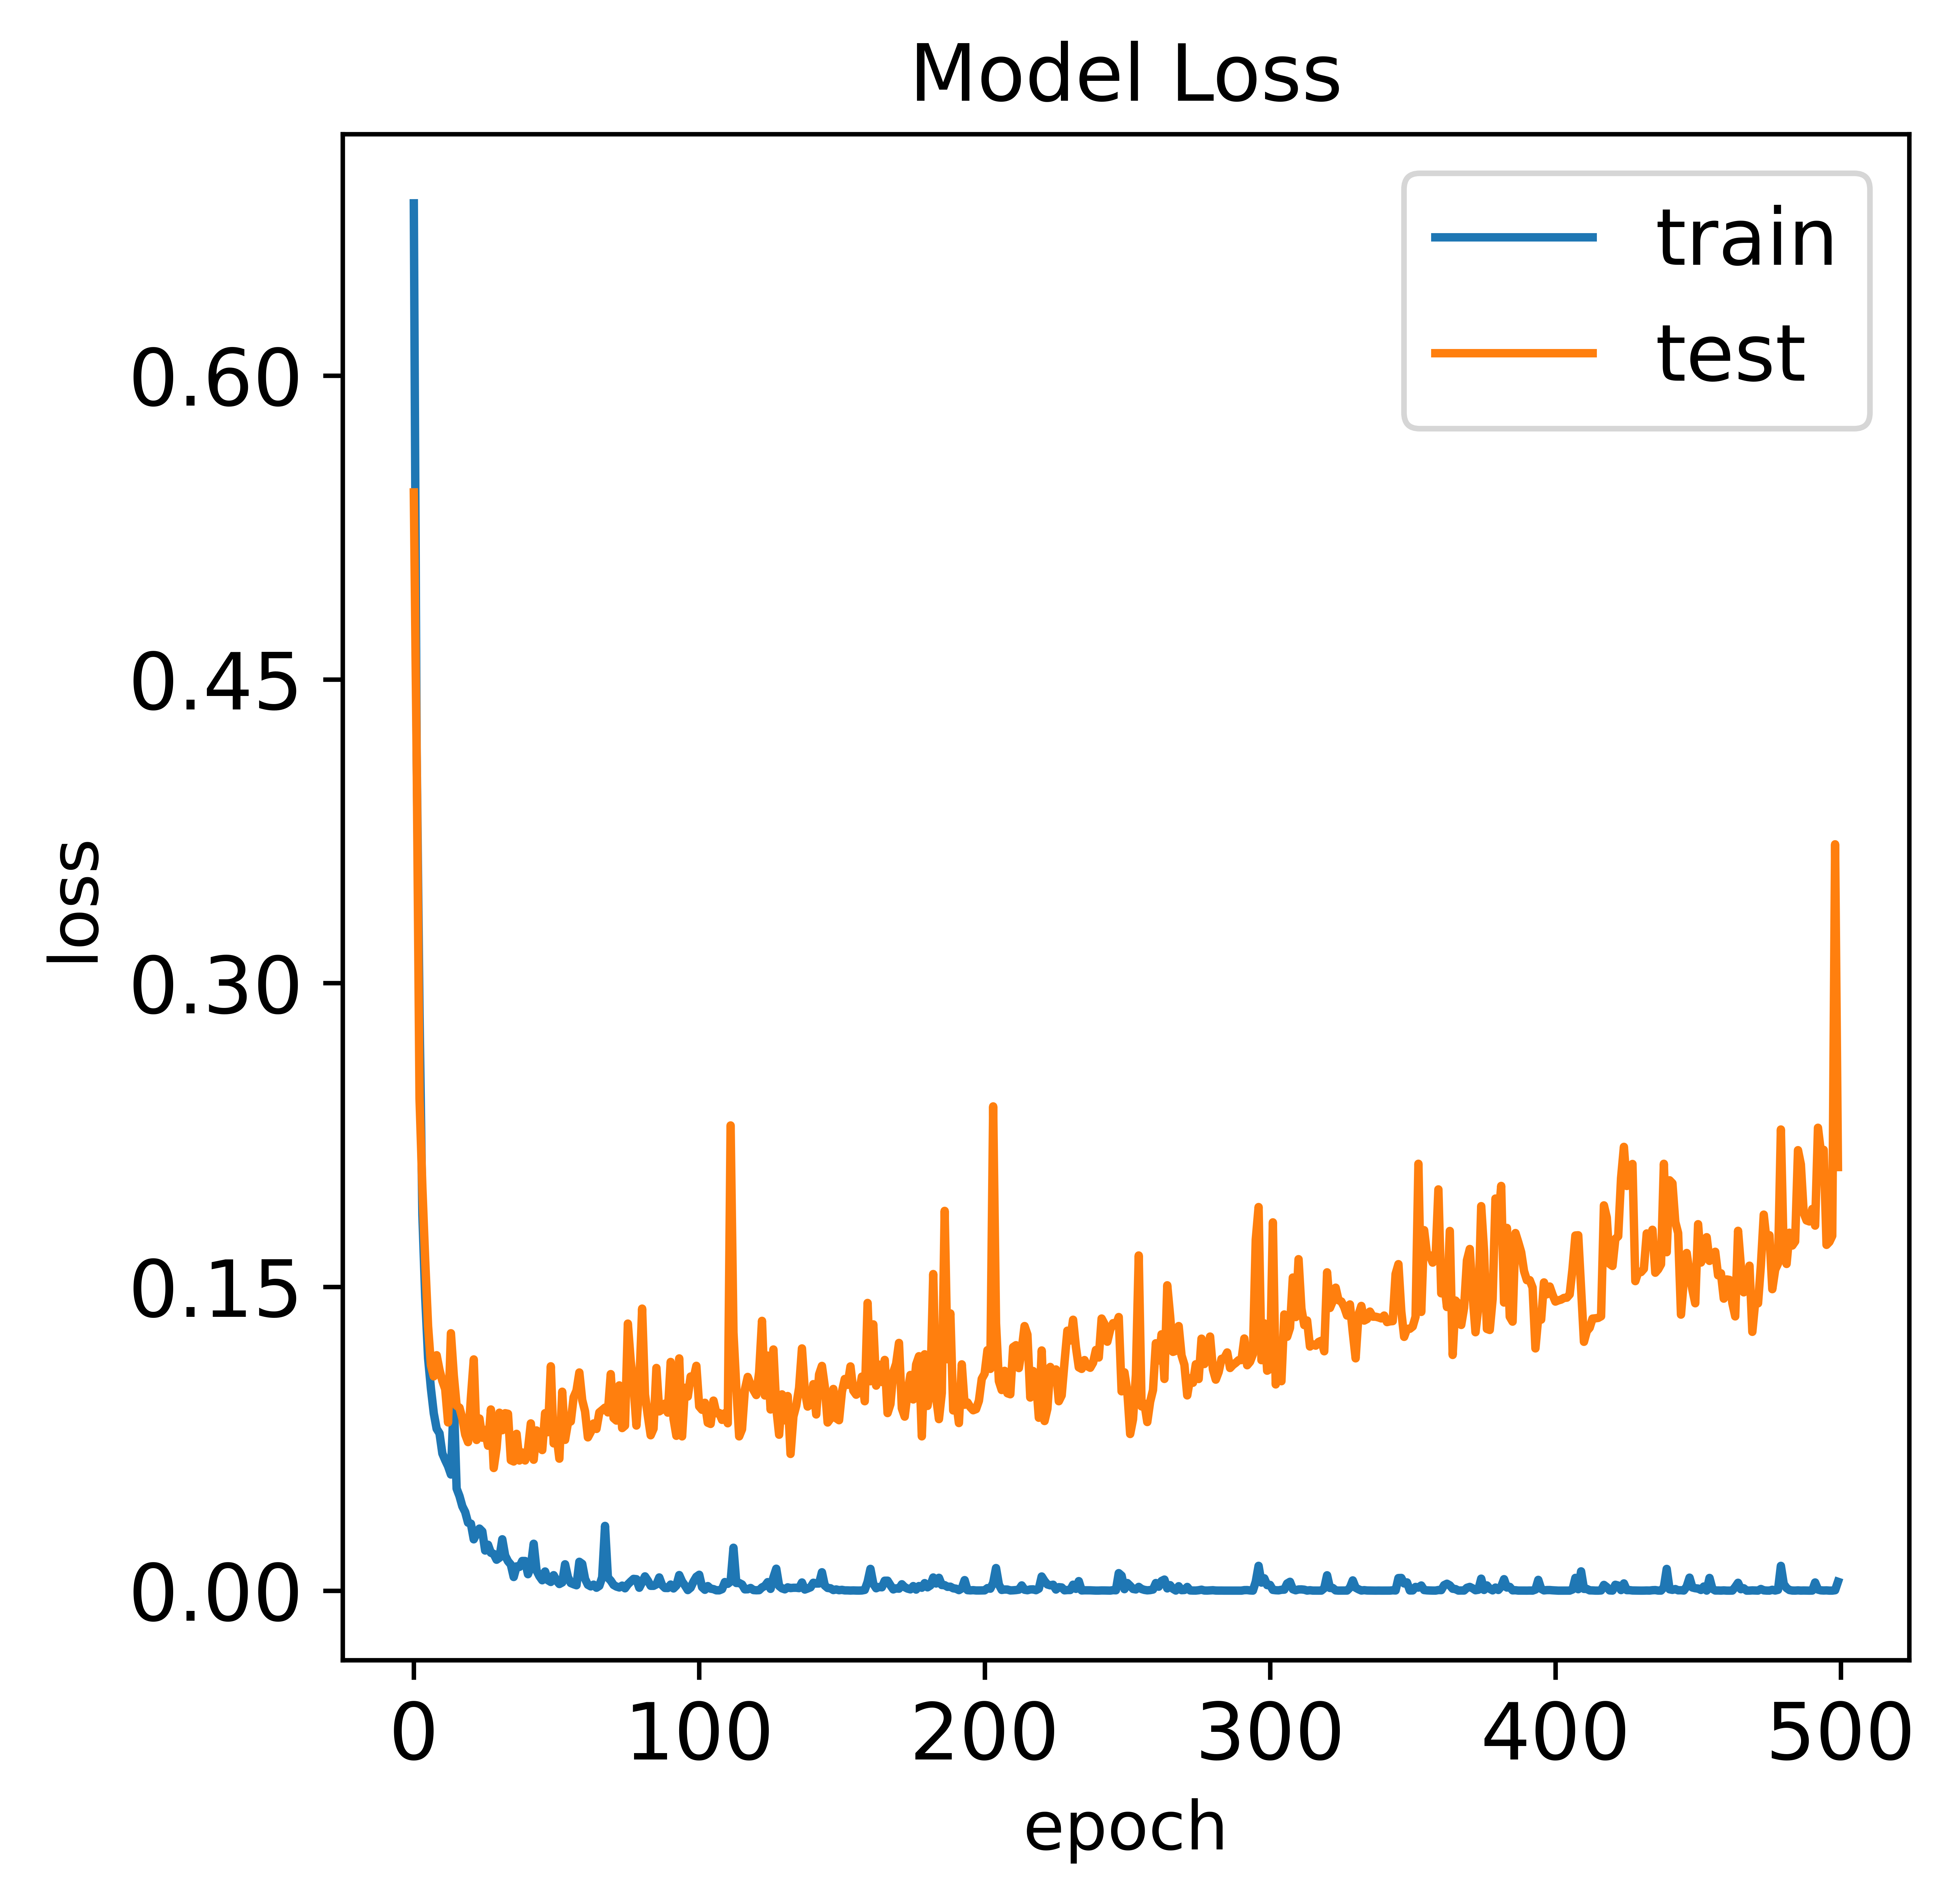

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#plt.rcParams.update({'font.size': 22})
SMALL_SIZE = 14
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(5,5),dpi=1200)
ax = fig.add_subplot(111)
#ax.yaxis.set_major_locator(MaxNLocator(5)) 
ax.xaxis.set_major_locator(MaxNLocator(6))
# summarize history for accuracy
ax.plot(history.history['accuracy'],'-')
ax.plot(history.history['val_accuracy'],'-')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='lower right')
plt.show()

fig = plt.figure(figsize=(5,5),dpi=1200)
ax = fig.add_subplot(111)
# summarize history for loss
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.yaxis.set_major_locator(MaxNLocator(6)) 
ax.xaxis.set_major_locator(MaxNLocator(6))
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')
plt.show()

# Confuse Matrix For Classification

In [17]:
#Convert array of predict to scale number [1, 0, 0]: 0; [0, 1, 0]: 1; [0, 0, 1]: 2;
import numpy as np 

y_pred= np.round(np.clip(model.predict(X_test), 0, 1))
def mapping(y_pred):
  
  y_map = list()
  for x in y_pred:
    if (x == [1, 0, 0,]).all():
      y_map.append(0)
    elif (x == [0, 1, 0]).all():
      y_map.append(1)
    else:
      y_map.append(2)

  return y_map

y_mpred = mapping(y_pred)
y_mtest = mapping(y_test)


### Save data for later using

In [21]:
import pickle
with open('TrainHist.pickle', 'wb') as f:
  pickle.dump([y_mpred, y_mtest], f)

###Load data for using

In [40]:
with open('TrainHist.pickle', 'rb') as f:
    y_mpred, y_mtest = pickle.load(f)

[[0.99151344 0.00424929 0.00500835]
 [0.00565771 0.99291785 0.00166945]
 [0.02263083 0.         0.97328881]]


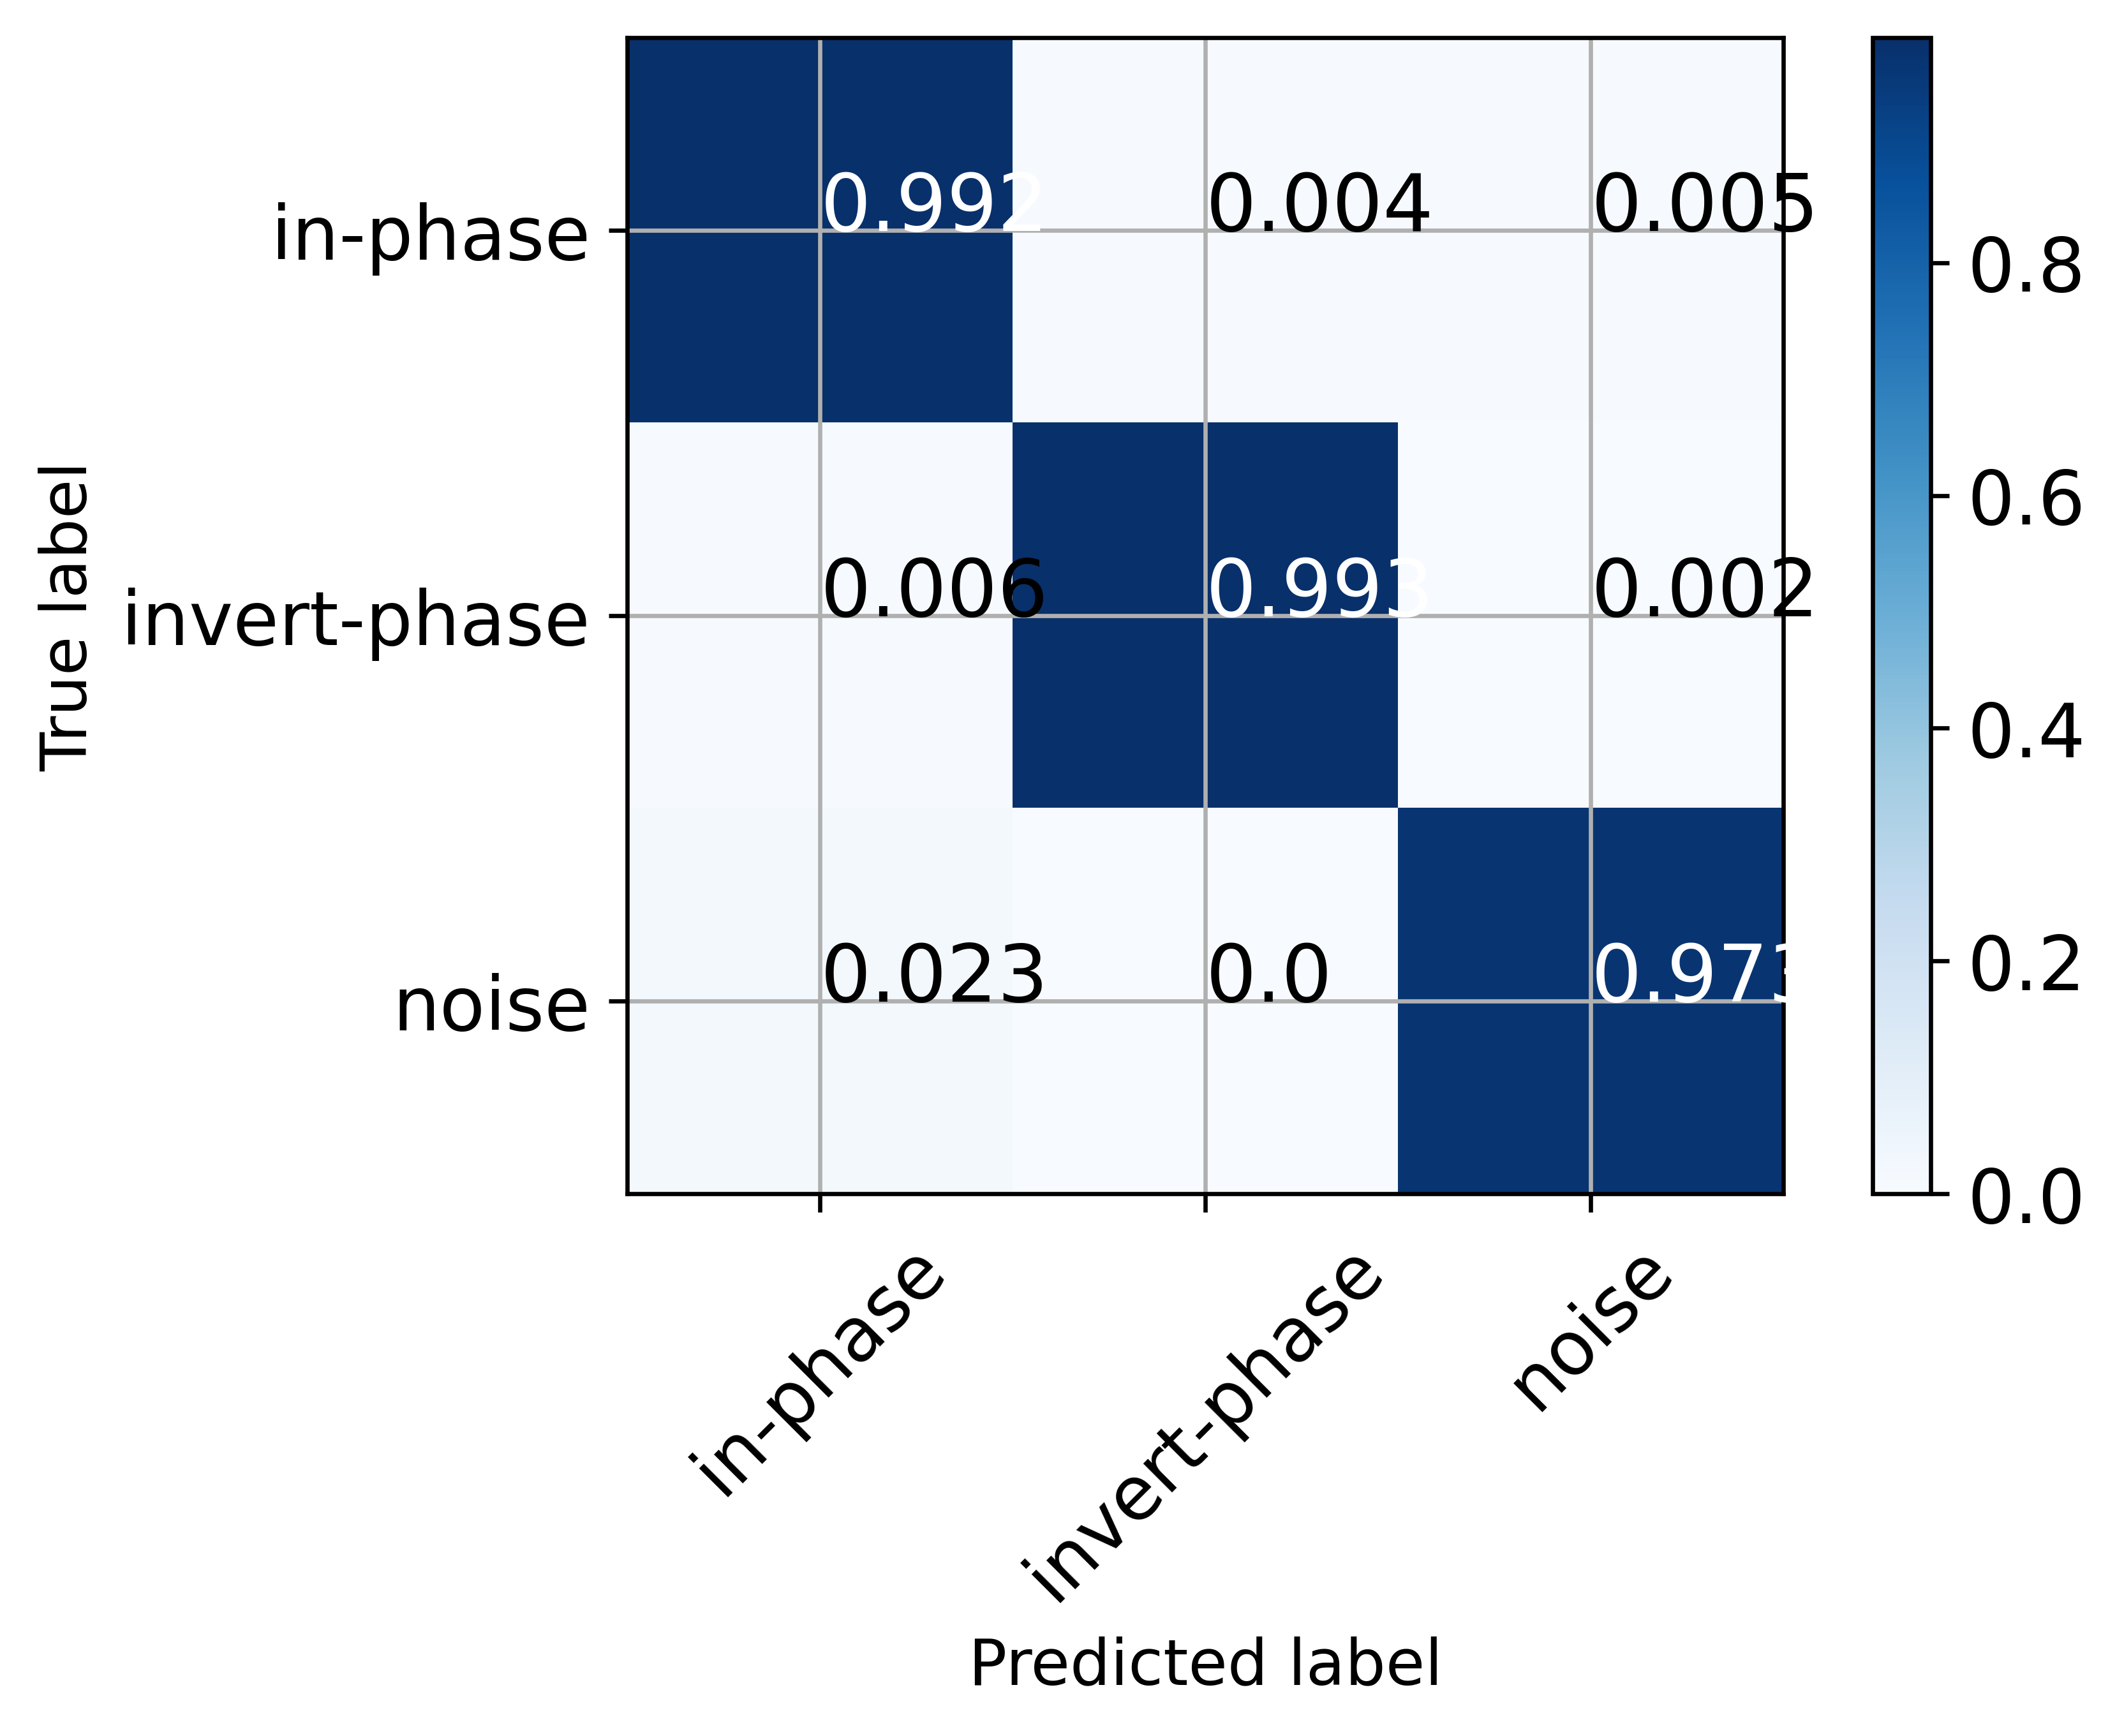

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
# making prediction
##y_pred = model.predict(X_test)
#y_pred= np.round(np.clip(model.predict(X_test), 0, 1))
# confuse matrix
cm = confusion_matrix(y_mtest,y_mpred)
Norm_cm =  cm/ cm.astype(np.float).sum(axis=1)



print(Norm_cm)

cm = Norm_cm
# setup figure
#fig = plt.figure(figsize=(8,4),dpi=300)
#ax = fig.add_subplot(111)
plt.figure(dpi=600)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) #Wistia

class_names = ["in-phase", "invert-phase","noise"]
#plt.title('Confusion Matrix betwen three classes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
#s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[1]):
    for j in range(cm.shape[1]):
        if i==j:
          plt.text(j,i, round((cm[i][j]),3),fontsize=15, color="white")
        else:
          plt.text(j,i, round((cm[i][j]),3),fontsize=15, color="Black")
#plt.axis(off)
plt.grid(b=None)
plt.colorbar()
plt.show()


In [23]:
cm

array([[0.99151344, 0.00424929, 0.00500835],
       [0.00565771, 0.99291785, 0.00166945],
       [0.02263083, 0.        , 0.97328881]])

In [21]:
format(Norm_cm, '.2f')

TypeError: ignored

In [58]:
float('%.1g' % 0.0623)

0.06

<Figure size 3600x2400 with 0 Axes>

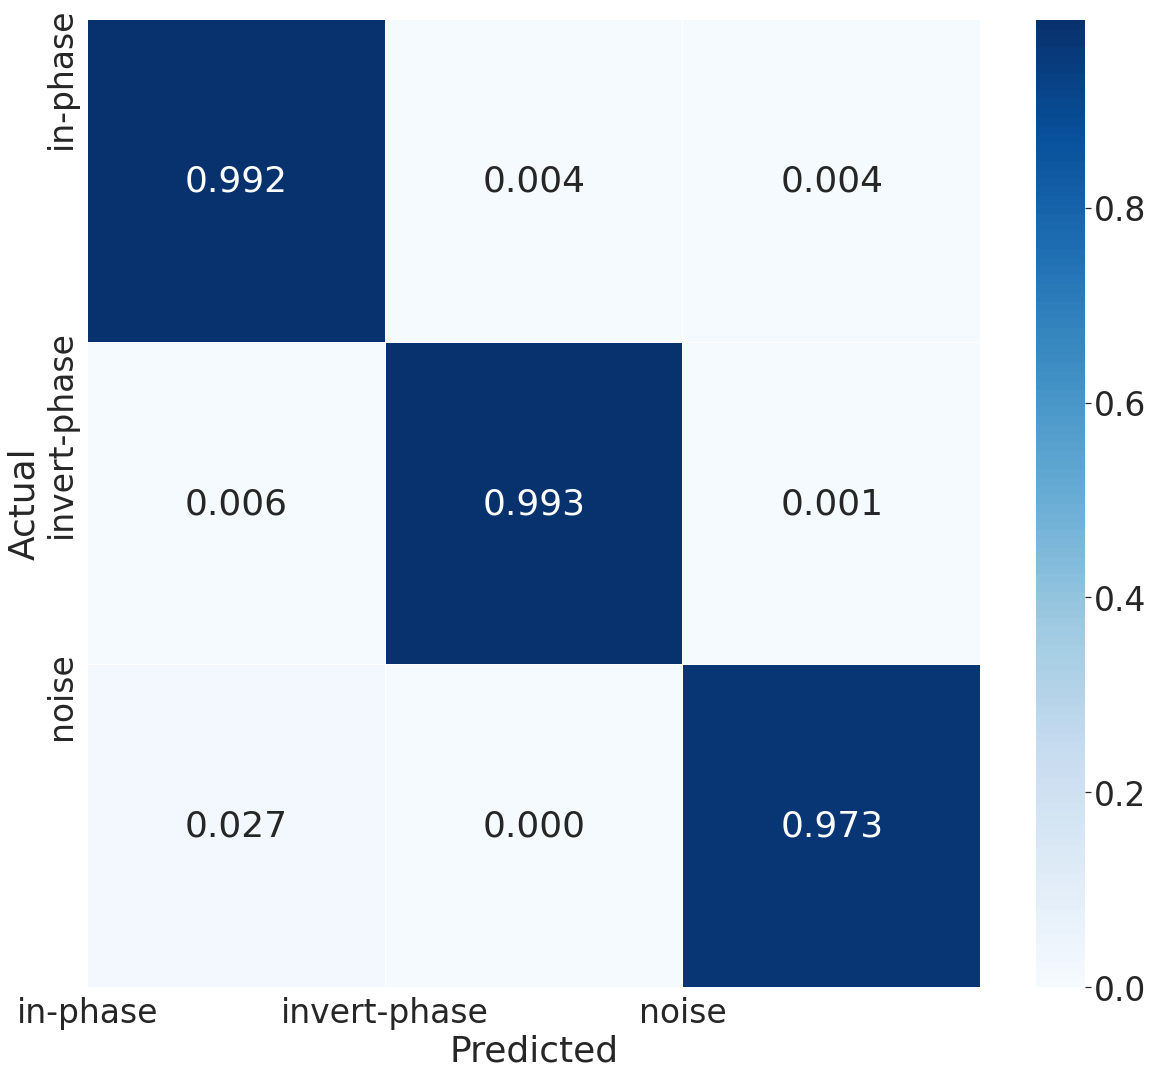

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
#cm = [[0.98868458, 0.00708215, 0.00500835],
#       [0.00565771, 0.99008499, 0.00500835],
#       [0.01697313, 0.00424929, 0.97495826]];
cm = confusion_matrix(y_mtest, y_mpred)
# Normalise
colormap = sns.color_palette("Blues", 110) 
class_names = ['in-phase', 'invert-phase','noise']
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(dpi=600)
#fig = plt.figure(figsize=(18,15),dpi=1200)
fig, ax = plt.subplots(figsize=(20,17.8))
#f, (ax, cbar_ax) = plt.subplots(1,2, figsize=(18,15), gridspec_kw={'wspace':0.05, 'width_ratios':(0.8,0.1)} )
sns.heatmap(cmn, annot=True, fmt='.3f',linewidths = 0.1, xticklabels=class_names, yticklabels=class_names, cmap=colormap)
sns.set(font_scale=3)
plt.xticks( tick_marks, class_names, rotation=0)
#ax.xaxis.set_minor_locator(MaxNLocator(6))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.yticks( tick_marks, class_names,rotation=90)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show(block=True)


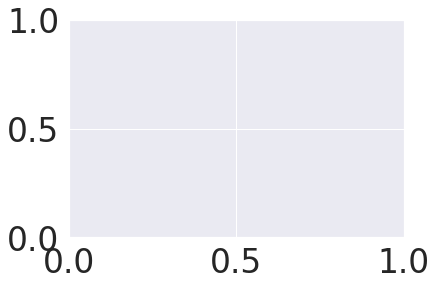

In [26]:
locs, labels = plt.xticks()

In [33]:
tick_marks

array([0, 1, 2])